# "WHY ARE ALL MY STUDENTS SICK?!" - A model

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import random
import decimal

In [2]:
state = State(
   s = 355,
    i = 20,
    w = 5, 
    r = 5)

,values
s,355
i,20
w,5
r,5


In [3]:
system = System(
        infection_rate = float(decimal.Decimal(random.randrange(25, 50))/100), #random.randint(0.25,0.5),
        vaccination_rate = .1, 
        reinfection_rate = float(decimal.Decimal(random.randrange(15, 40))/100), #random.randint(0.15,0.4),
        recovery_rate = float(decimal.Decimal(random.randrange(10, 30))/100), #random.randint(0.1,0.3),
        complete_recovery_rate = float(decimal.Decimal(random.randrange(1, 250))/1000), #random.randint(0.001,0.25), 
        immunity_wearsoff = float(decimal.Decimal(random.randrange(90,100))/100), #random.randint(0.1,0.5),
        t0 = 0 ,
        t_end = 116,
        dt = 1)

  

,values
infection_rate,0.380
vaccination_rate,0.100
reinfection_rate,0.390
recovery_rate,0.270
complete_recovery_rate,0.147
immunity_wearsoff,0.950
t0,0.000
t_end,116.000
dt,1.000


In [4]:
def update_function(state, t, system):

    unpack(system)
    ds = (-(vaccination_rate) * state.s - (infection_rate)*(state.s-(vaccination_rate * state.s)) + immunity_wearsoff * state.r) 
    di = ((infection_rate) * (state.s-(vaccination_rate * state.s)) + (reinfection_rate)* (state.w) - (recovery_rate) * state.i) 
    dw = ((vaccination_rate) * state.s - (complete_recovery_rate) * state.w - (reinfection_rate) * state.w + (recovery_rate) *state.i) 
    dr = ((complete_recovery_rate) * state.w - immunity_wearsoff * state.r )
    
    s2 = state.s + ds + state.r + dr
    i2 = state.i + di
    w2 = state.w + dw
    r2 = 0
    
    state = State(s=s2, i=i2, w=w2, r=r2)
    return state
    
    #infectionrate -> constate based on- > sleep stress weather  
    #recovery rate = random value 1/4 chance of recovery on each day if recovery duration is 4 days. 

In [5]:
def run_simulation(system, update):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t0] = state
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update(frame.row[t], t, system)
#         system = System(
#         infection_rate = float(decimal.Decimal(random.randrange(25, 50))/100), #random.randint(0.25,0.5),
#         vaccination_rate = .1, 
#         reinfection_rate = float(decimal.Decimal(random.randrange(15, 40))/100), #random.randint(0.15,0.4),
#         recovery_rate = float(decimal.Decimal(random.randrange(10, 30))/100), #random.randint(0.1,0.3),
#         complete_recovery_rate = float(decimal.Decimal(random.randrange(1, 250))/1000), #random.randint(0.001,0.25), 
#         immunity_wearsoff = float(decimal.Decimal(random.randrange(10, 50))/100), #random.randint(0.1,0.5),
#         t0 = 0 ,
#         t_end = 116,
#         dt = 1)
    
    return frame

In [6]:
results = run_simulation(system, update_function)
results.head()

,s,i,w,r
0.0,355,20,5,5
1.0,203.825,137.96,43.215,0
2.0,120.087,187.273,77.6402,0
3.0,78.4216,208.059,98.5198,0
4.0,58.2417,217.126,109.633,0


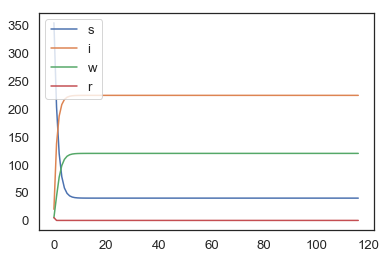

In [7]:
results.plot()

In [8]:
#plot-> 2 types of graphs 
    #one where I and W are seperate lines and another when they are added together to make the same line
    
#IF MODEL WORKS
    #run links as dataframe for more complex code